In [13]:
#
# Multiple plots with Matplotlib based on a simple dataset.
#

# Ref: http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})


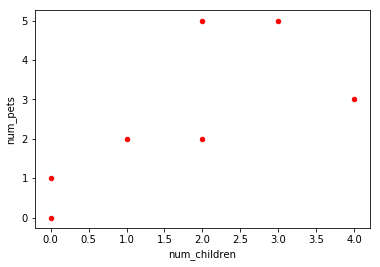

In [6]:
# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

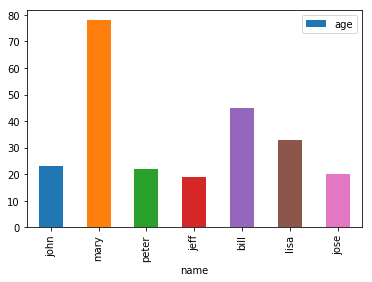

In [7]:
# a simple line plot
df.plot(kind='bar',x='name',y='age')
plt.show()

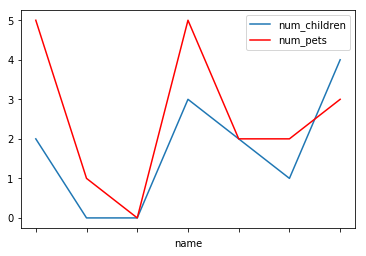

In [8]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

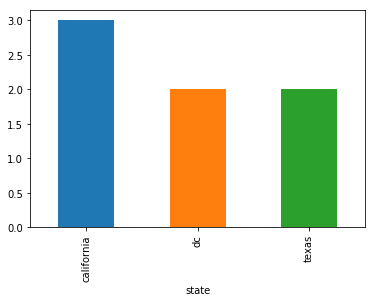

In [9]:
# Number of unique name per state:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

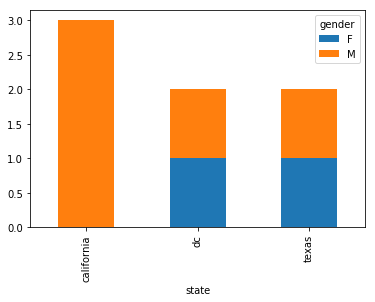

In [11]:
df.groupby(['state','gender'])['name'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

    name  age gender       state  num_children  num_pets
0   john   23      M  california             2         5
1   mary   78      F          dc             0         1
2  peter   22      M  california             0         0
3   jeff   19      M          dc             3         5
4   bill   45      M  california             2         2
5   lisa   33      F       texas             1         2
6   jose   20      M       texas             4         3


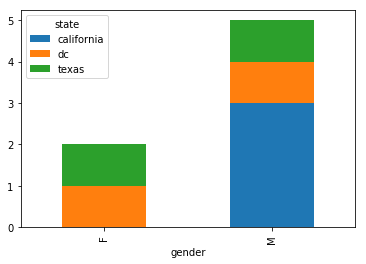

In [18]:
# Count people by gender, splitting by state:
print(df)
df.groupby(['gender','state'])['age'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

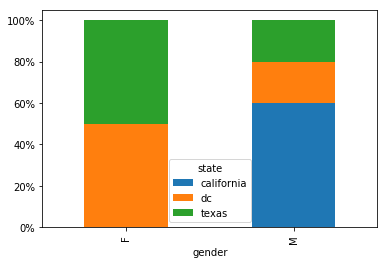

In [14]:
# People grouped by state and gender, with normalized columns so that each sums up to 100%:

df.groupby(['gender','state'])['age'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


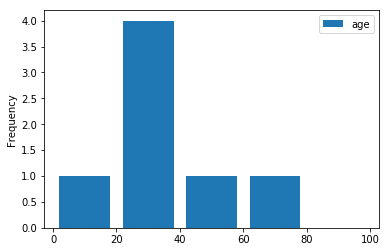

In [15]:
# Plot the most common age group and divide it into bins:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()